In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('./dstyle1.mplstyle')

from spectral_lag import correlate, fit_ccf, poly, make_sim_fits

In [11]:
data = np.loadtxt('GRB20211227_T84726_64ms_BAT.thr')
i_beg = 3737
i_end = 3785
n_shift = 8
res = 0.064
n_sim = 200
 
data_c = data[i_beg:i_end+1,:]

In [12]:
dic_chan = {'Ch21':(3,1), 'Ch32':(5,3), 'Ch31':(5,1)}
chan = 'Ch32'
i_ch_low_e, i_ch_hi_e = dic_chan[chan]

In [13]:
lst_ccf_sim, lst_ccf_sim_fit, lst_ccf_sim_fit_argmax = \
     make_sim_fits(data_c, i_ch_low_e, i_ch_hi_e, n_shift, n_sim)

In [14]:
arr_dt, arr_ccf, arr_ccf_err =\
        correlate(data_c[:,i_ch_hi_e],  data_c[:,i_ch_hi_e+1], 
                  data_c[:,i_ch_low_e], data_c[:,i_ch_low_e+1], n_shift)

popt, pcov, x_max = fit_ccf(arr_dt*res, arr_ccf, arr_ccf_err)
x = np.linspace(-0.5, 0.5, 20)
y_ = poly(x,*popt)

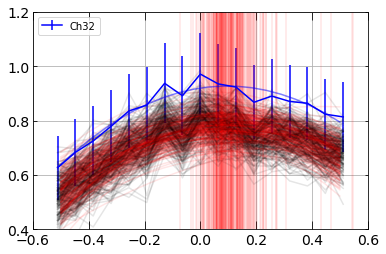

In [15]:
for i in range(n_sim):
    plt.plot(arr_dt*res, lst_ccf_sim[i], c='k', alpha=0.1)
    y = poly(x, *lst_ccf_sim_fit[i])
    plt.plot(x, y, c='r', alpha=0.1)
    plt.axvline(lst_ccf_sim_fit_argmax[i], 0.0, 1.5, c='r', alpha=0.1)

plt.errorbar(arr_dt*res, arr_ccf, yerr=arr_ccf_err, c='b', label=f'{chan}')
plt.plot(x, y_, c='b', alpha=0.5)
    
plt.legend()
plt.grid()
plt.xlim(-0.6,0.6)
plt.ylim(0.4, 1.2)
plt.show()

In [16]:
x_max = np.median(lst_ccf_sim_fit_argmax)
err_dn = np.quantile(lst_ccf_sim_fit_argmax, 0.16) - x_max
err_up = np.quantile(lst_ccf_sim_fit_argmax, 0.84) - x_max
print("lag{:s}: {:8.3f} ({:+.3f}, {:+.3f})".format(chan, x_max, err_dn, err_up))

lagCh32:    0.100 (-0.051, +0.071)
